In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('2013/Divvy_Trips_2013.csv', low_memory=False)

data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthday
0,4118,2013-06-27 12:11,2013-06-27 12:16,480,316,85,Michigan Ave & Oak St,28,Larrabee St & Menomonee St,Customer,NaN,NaN
1,4275,2013-06-27 14:44,2013-06-27 14:45,77,64,32,Racine Ave & Congress Pkwy,32,Racine Ave & Congress Pkwy,Customer,NaN,NaN
2,4291,2013-06-27 14:58,2013-06-27 15:05,77,433,32,Racine Ave & Congress Pkwy,19,Loomis St & Taylor St,Customer,NaN,NaN
3,4316,2013-06-27 15:06,2013-06-27 15:09,77,123,19,Loomis St & Taylor St,19,Loomis St & Taylor St,Customer,NaN,NaN
4,4342,2013-06-27 15:13,2013-06-27 15:27,77,852,19,Loomis St & Taylor St,55,Halsted St & James M Rochford St,Customer,NaN,NaN


In [3]:
#drop the empty columns gender and birthday

data= data.drop(['gender', 'birthday'], axis=1)

data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype
0,4118,2013-06-27 12:11,2013-06-27 12:16,480,316,85,Michigan Ave & Oak St,28,Larrabee St & Menomonee St,Customer
1,4275,2013-06-27 14:44,2013-06-27 14:45,77,64,32,Racine Ave & Congress Pkwy,32,Racine Ave & Congress Pkwy,Customer
2,4291,2013-06-27 14:58,2013-06-27 15:05,77,433,32,Racine Ave & Congress Pkwy,19,Loomis St & Taylor St,Customer
3,4316,2013-06-27 15:06,2013-06-27 15:09,77,123,19,Loomis St & Taylor St,19,Loomis St & Taylor St,Customer
4,4342,2013-06-27 15:13,2013-06-27 15:27,77,852,19,Loomis St & Taylor St,55,Halsted St & James M Rochford St,Customer


In [4]:
#checking the datatypes

data.dtypes

trip_id               int64
starttime            object
stoptime             object
bikeid                int64
tripduration          int64
from_station_id       int64
from_station_name    object
to_station_id         int64
to_station_name      object
usertype             object
dtype: object

In [5]:
#fixing the datatypes

#for starttime
data['starttime']= pd.to_datetime(data['starttime'])

#for stoptime
data['stoptime']= pd.to_datetime(data['stoptime'])

In [6]:
#adding coluumns for month of the year and day of the week

data['Day-of-the-week']= data['starttime'].dt.day_name()
data['Month']= data['starttime'].dt.month

data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,Day-of-the-week,Month
0,4118,2013-06-27 12:11:00,2013-06-27 12:16:00,480,316,85,Michigan Ave & Oak St,28,Larrabee St & Menomonee St,Customer,Thursday,6
1,4275,2013-06-27 14:44:00,2013-06-27 14:45:00,77,64,32,Racine Ave & Congress Pkwy,32,Racine Ave & Congress Pkwy,Customer,Thursday,6
2,4291,2013-06-27 14:58:00,2013-06-27 15:05:00,77,433,32,Racine Ave & Congress Pkwy,19,Loomis St & Taylor St,Customer,Thursday,6
3,4316,2013-06-27 15:06:00,2013-06-27 15:09:00,77,123,19,Loomis St & Taylor St,19,Loomis St & Taylor St,Customer,Thursday,6
4,4342,2013-06-27 15:13:00,2013-06-27 15:27:00,77,852,19,Loomis St & Taylor St,55,Halsted St & James M Rochford St,Customer,Thursday,6


In [37]:
# Check the number of bikes that the company has 

len(data['bikeid'].unique())

2887

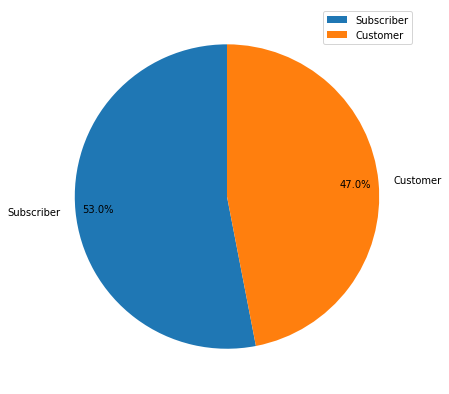

In [39]:
#what are the different usertype

plt.figure(figsize=(7,7))
plt.pie(data['usertype'].value_counts(), labels= data['usertype'].value_counts().index, 
        autopct='%1.1f%%', pctdistance=0.85, startangle=90)
plt.legend()
plt.show()

In [45]:
# analysing the stations that has the most trips 

data['from_station_name'].value_counts().sort_values(ascending=False).head(20)

Millennium Park                 17272
Streeter Dr & Illinois St       16710
Lake Shore Dr & Monroe St       15673
Clinton St & Washington Blvd    14967
Michigan Ave & Oak St           13274
Museum Campus                   12676
McClurg Ct & Illinois St        10847
Michigan Ave & Lake St          10760
Canal St & Jackson Blvd         10141
Franklin St & Jackson Blvd       9784
Theater on the Lake              9082
Daley Center Plaza               8810
Michigan Ave & Washington St     8629
Michigan Ave & Pearson St        8487
Clinton St & Madison St          8327
Dearborn St & Adams St           8112
Wabash Ave & Roosevelt Rd        8059
Canal St & Madison St            8028
Dearborn St & Monroe St          7989
State St & Kinzie St             7930
Name: from_station_name, dtype: int64

In [53]:
# checking the stations with the most docks

stations= pd.read_csv('2013/Divvy_Stations_2013.csv')

stations[['name', 'dpcapacity']].sort_values('dpcapacity', ascending=False).head(20)

,name,dpcapacity
58,Daley Center Plaza,47
26,Michigan Ave & Washington St,43
22,Streeter Dr & Illinois St,35
54,Canal St & Jackson Blvd,35
64,Millennium Park,35
34,Clark St & Randolph St,31
65,Clinton St & Washington Blvd,31
33,Clark St & Congress Pkwy,27
20,State St & Van Buren St,27
27,State St & Randolph St,27


In [8]:
##first group the data according to the usertype and day-of-the-week
dat1= data.groupby(['usertype', 'Day-of-the-week']).size().reset_index()

customer= list(dat1[dat1['usertype']=='Customer'][0])
subscriber= list(dat1[dat1['usertype']=='Subscriber'][0])


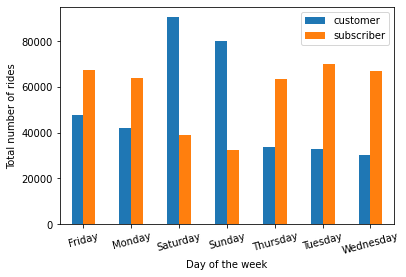

In [9]:
#which day of the week is the busiest for customers and subscribers

index= dat1['Day-of-the-week']
dat= {'customer': customer, 'subscriber':subscriber}

dataframe= pd.DataFrame(data=dat, index=index.unique())

dataframe.plot.bar(rot=15)
plt.xlabel('Day of the week')
plt.ylabel('Total number of rides')
plt.show(block= True)

In [10]:
#first group the data according to the usertype and month of the year

dat2= data.groupby(['usertype', 'Month']).size().reset_index()

customer2= list(dat2[dat2['usertype']=='Customer'][0])
subscriber2= list(dat2[dat2['usertype']=='Subscriber'][0])



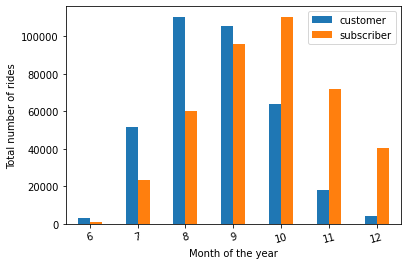

In [11]:
#which month has the most subscriber and customer

index2= dat2['Month']
data2= {'customer': customer2, 'subscriber':subscriber2}

dataframe2= pd.DataFrame(data=data2, index=index2.unique())

dataframe2.plot.bar(rot=15)
plt.xlabel('Month of the year')
plt.ylabel('Total number of rides')
plt.show(block= True)


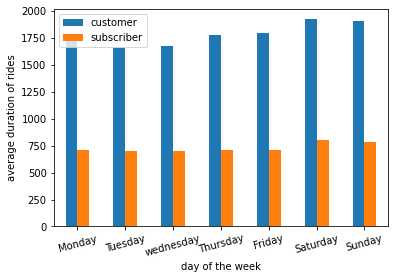

In [30]:
#average duration per day for both customers and subscribers

Monday = data[data['Day-of-the-week']=='Monday']
mon_cust= Monday[Monday['usertype']=='Customer']
mon_cust_avg= mon_cust['tripduration'].mean(axis=0)
mon_sub= Monday[Monday['usertype']=='Subscriber']
mon_sub_avg= mon_sub['tripduration'].mean(axis=0)

Tuesday = data[data['Day-of-the-week']=='Tuesday']
tue_cust= Tuesday[Tuesday['usertype']=='Customer']
tue_cust_avg= tue_cust['tripduration'].mean(axis=0)
tue_sub= Tuesday[Tuesday['usertype']=='Subscriber']
tue_sub_avg= tue_sub['tripduration'].mean(axis=0)

Wednesday = data[data['Day-of-the-week']=='Wednesday']
wed_cust= Wednesday[Wednesday['usertype']=='Customer']
wed_cust_avg= wed_cust['tripduration'].mean(axis=0)
wed_sub= Wednesday[Wednesday['usertype']=='Subscriber']
wed_sub_avg= wed_sub['tripduration'].mean(axis=0)

Thursday = data[data['Day-of-the-week']=='Thursday']
thur_cust= Thursday[Thursday['usertype']=='Customer']
thur_cust_avg= thur_cust['tripduration'].mean(axis=0)
thur_sub= Thursday[Thursday['usertype']=='Subscriber']
thur_sub_avg= thur_sub['tripduration'].mean(axis=0)

Friday = data[data['Day-of-the-week']=='Friday']
fri_cust= Friday[Friday['usertype']=='Customer']
fri_cust_avg= fri_cust['tripduration'].mean(axis=0)
fri_sub= Friday[Friday['usertype']=='Subscriber']
fri_sub_avg= fri_sub['tripduration'].mean(axis=0)

Saturday = data[data['Day-of-the-week']=='Saturday']
sat_cust= Saturday[Saturday['usertype']=='Customer']
sat_cust_avg= sat_cust['tripduration'].mean(axis=0)
sat_sub= Saturday[Saturday['usertype']=='Subscriber']
sat_sub_avg= sat_sub['tripduration'].mean(axis=0)

Sunday = data[data['Day-of-the-week']=='Sunday']
sun_cust= Sunday[Sunday['usertype']=='Customer']
sun_cust_avg= sun_cust['tripduration'].mean(axis=0)
sun_sub= Sunday[Sunday['usertype']=='Subscriber']
sun_sub_avg= sun_sub['tripduration'].mean(axis=0)

Customer= list([mon_cust_avg, tue_cust_avg, wed_cust_avg, thur_cust_avg,
                          fri_cust_avg, sat_cust_avg, sun_cust_avg])
Subscriber= list([mon_sub_avg, tue_sub_avg, wed_sub_avg, thur_sub_avg,
                          fri_sub_avg, sat_sub_avg, sun_sub_avg])

index= ['Monday', 'Tuesday', 'wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dat3= {'customer': Customer, 'subscriber': Subscriber}


dataframe3=pd.DataFrame(data=dat3, index=index)

dataframe3.plot.bar(rot=15)
plt.xlabel('day of the week')
plt.ylabel('average duration of rides')
plt.show(block= True)

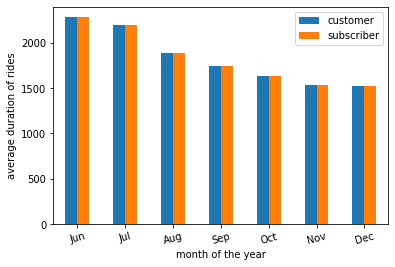

In [36]:
#average duration per month for both customers and subscribers

June = data[data['Month']== 6]
jun_cust= June[June['usertype']=='Customer']
jun_cust_avg= jun_cust['tripduration'].mean(axis=0)
jun_sub= June[June['usertype']=='Subscriber']
jun_sub_avg= jun_sub['tripduration'].mean(axis=0)

July = data[data['Month']==7]
jul_cust= July[July['usertype']=='Customer']
jul_cust_avg= jul_cust['tripduration'].mean(axis=0)
jul_sub= July[July['usertype']=='Subscriber']
jul_sub_avg= jul_sub['tripduration'].mean(axis=0)

August = data[data['Month']==8]
aug_cust= August[August['usertype']=='Customer']
aug_cust_avg= aug_cust['tripduration'].mean(axis=0)
aug_sub= August[August['usertype']=='Subscriber']
aug_sub_avg= aug_sub['tripduration'].mean(axis=0)

September = data[data['Month']==9]
sep_cust= September[September['usertype']=='Customer']
sep_cust_avg= sep_cust['tripduration'].mean(axis=0)
sep_sub= September[September['usertype']=='Subscriber']
sep_sub_avg= sep_sub['tripduration'].mean(axis=0)

October = data[data['Month']==10]
oct_cust= October[October['usertype']=='Customer']
oct_cust_avg= oct_cust['tripduration'].mean(axis=0)
oct_sub= October[October['usertype']=='Subscriber']
oct_sub_avg= oct_sub['tripduration'].mean(axis=0)

November = data[data['Month']==11]
nov_cust= November[November['usertype']=='Customer']
nov_cust_avg= nov_cust['tripduration'].mean(axis=0)
nov_sub= November[November['usertype']=='Subscriber']
nov_sub_avg= nov_sub['tripduration'].mean(axis=0)

December = data[data['Month']==12]
dec_cust= December[December['usertype']=='Customer']
dec_cust_avg= dec_cust['tripduration'].mean(axis=0)
dec_sub= December[December['usertype']=='Subscriber']
dec_sub_avg= dec_sub['tripduration'].mean(axis=0)

Customer= list([jun_cust_avg, jul_cust_avg, aug_cust_avg, sep_cust_avg,
                oct_cust_avg, nov_cust_avg, dec_cust_avg])
Subscriber= list([jun_cust_avg, jul_cust_avg, aug_cust_avg, sep_cust_avg,
                oct_cust_avg, nov_cust_avg, dec_cust_avg])
index= ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
dat4= {'customer': Customer, 'subscriber': Subscriber}


dataframe4=pd.DataFrame(data=dat4, index=index)

dataframe4.plot.bar(rot=15)
plt.xlabel('month of the year')
plt.ylabel('average duration of rides')
plt.show(block= True)